# Data collection and statistics for relevant sentences
We want the final answer extractor to output answers and a set of sentences from the context that are relevant for the given question/answer pair. Thus, in the training data we want both the correct answer (which we have) and the set of sentences that are relevant for the answer. This notebook does two things:
1. For the given dataset, for each text-object it extracts the sentences that are relevant for the question/answer pair
    1. A sentence is deemed relevant if there is word overlap between the sentence and the answer/question.
    1. Possible to do some simpler inference here, to deem other sentences relevant (at a later stage)
1. Provide some statistics and categorization of the data, based on how many sentences are relevant to the quetion/answer

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the original data
df_word_o = pd.read_pickle("../data_frames/relevant_sentences/original_data/word.pkl")
df_word_stop_o = pd.read_pickle("../data_frames/relevant_sentences/original_data/word_stop.pkl")
df_lemma_o = pd.read_pickle("../data_frames/relevant_sentences/original_data/lemma.pkl")
df_lemma_stop_o = pd.read_pickle("../data_frames/relevant_sentences/original_data/lemma_stop.pkl")

In [3]:
# load the cleaned data
df_word = pd.read_pickle("../data_frames/relevant_sentences/cleaned_data/word.pkl")
df_word_stop = pd.read_pickle("../data_frames/relevant_sentences/cleaned_data/word_stop.pkl")
df_lemma = pd.read_pickle("../data_frames/relevant_sentences/cleaned_data/lemma.pkl")
df_lemma_stop = pd.read_pickle("../data_frames/relevant_sentences/cleaned_data/lemma_stop.pkl")

In [19]:
def plot_question_type_stats(values, title):
    values.sort()
    values_str = [str(val) for val in values]
    plt.hist(values_str, color='teal')
    plt.ylabel('Number of Q/A pairs')
    plt.xlabel('Q/A pair class')
    plt.title(title)
    plt.show()

def plot_question_type_stats_num(values, title, bins=10, x_label='Relevant sentences'):
    min = np.min(values)
    max = np.max(values)
    bins = list(range(min, max+1))
    plt.hist(values, color='teal', bins=bins)
    plt.ylabel('Number of Q/A pairs')
    # calculate the 25-th percentile of number of relevant sentences
    if x_label == 'Relevant sentences':
        perc = np.percentile(values, 25)
        plt.axvline(perc, color='rebeccapurple', linestyle='dashed', linewidth=1, label='25-th percentile: {:.1f}'.format(perc))
        plt.legend()
    plt.xlabel(x_label)
    plt.title(title)
    plt.show()

def plot_proximity_stats(values, names, title, bins=3, colors=['darkslategray', 'teal', 'darkturquoise']):
    n, hist_bins, patches = plt.hist(values, color=colors, bins=bins, label=names)
    ticks = []
    for idx, patch in enumerate(patches[0]):
        print('patch: ', patch)
        ticks.append(patch.xy[0] + 0.3) # 0.3 is the width of the patch
    print(ticks)
    n_bins = bins
    print('n bins: ', n_bins)
    ticklabels = [i for i in range(n_bins)]
    plt.xticks(ticks, ticklabels)
    plt.ylabel('Number of Q/A pairs')
    plt.xlabel('Q/A pair class')
    plt.title(title)
    plt.legend()
    plt.show()


In [20]:
# plot sentence statistics for the original dataset
def display_sentence_statistics(df, title=''):
    # have to make copy!! otherwise it sorts the col in place in the df..
    df_c = df.copy()
    overlap_values = df_c['overlap_class'].values

    plot_question_type_stats(overlap_values, 'Q/A pair class distribution, '+title)

    df_class_1 = df.loc[df['overlap_class'] == 1]
    df_class_2 = df.loc[df['overlap_class'] == 2]
    df_class_3 = df.loc[df['overlap_class'] == 3]

    # plot the number of relevant sentences for each of the question types
    plot_question_type_stats_num(df['num_overlap_sentences'].values, 'Number of relevant sentences, '+title, None)
    # plot_question_type_stats_num(df_class_1['num_overlap_sentences'].values, 'Number of relevant sentences for question type 1', None)
    # plot_question_type_stats_num(df_class_2['num_overlap_sentences'].values, 'Number of relevant sentences for question type 2', None)
    # plot_question_type_stats_num(df_class_3['num_overlap_sentences'].values, 'Number of relevant sentences for question type 3', None)



    return overlap_values, [df_class_1, df_class_2, df_class_3]



In [21]:
def plot_overlap_comparison(values):
    names = ['Words', 'Words, stopwords removed', 'Lemmas', 'Lemmas, stopwords removed']
    colors = ['darkslategray', 'teal', 'rebeccapurple', 'indigo']
    title = 'Q/A class per pre-processing category'
    values_str = [[str(val) for val in vals] for vals in values]
    plot_proximity_stats(values_str, names, title, 3, colors)

def plot_cleaned_class_comparison(values):
    names = ['Original', 'Cleaned']
    colors = ['teal', 'darkslategray']
    title = 'Q/A class for original and cleaned data'
    values_str = [[str(val) for val in vals] for vals in values]
    plot_proximity_stats(values_str, names, title, 3, colors)

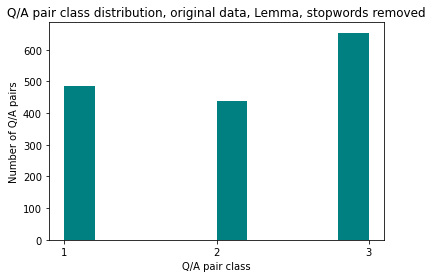

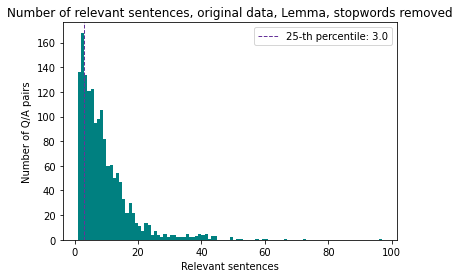

In [22]:
# compute stats for the original dataset
# overlap_values_word_o, df_word_class_vals_o = display_sentence_statistics(df_word_o, 'original data, word overlap')
# overlap_values_word_stop_o, df_word_stop_class_vals_o = display_sentence_statistics(df_word_stop_o, 'original data, word overlap, stopwords removed')
# overlap_values_lemma_o, df_lemma_class_vals_o = display_sentence_statistics(df_lemma_o, 'original data, lemma overlap')
overlap_values_lemma_stop_o, df_lemma_stop_class_vals_o = display_sentence_statistics(df_lemma_stop_o, 'original data, Lemma, stopwords removed')

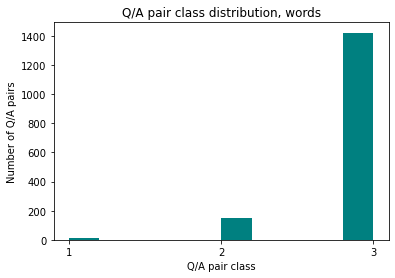

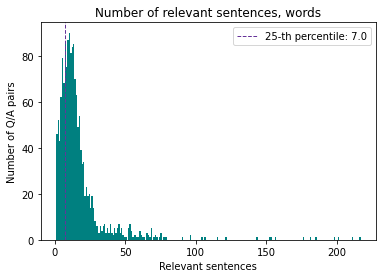

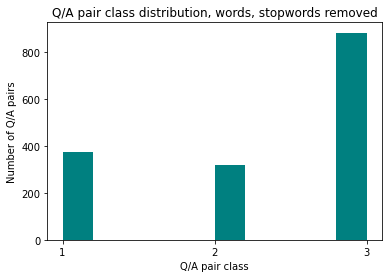

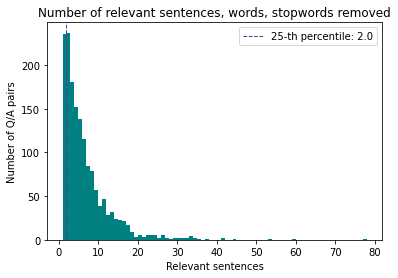

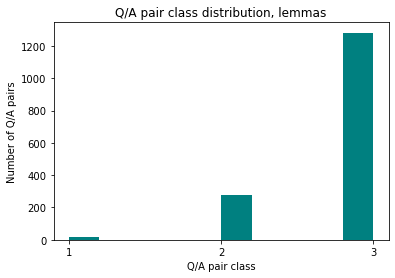

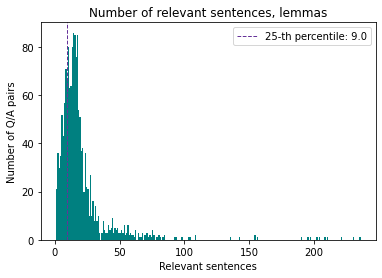

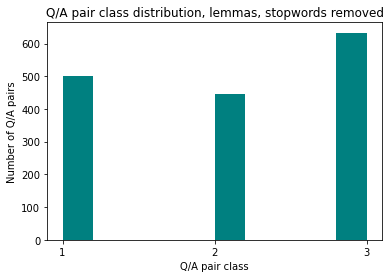

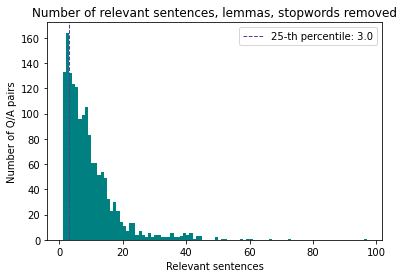

patch:  Rectangle(xy=(0.0666667, 0), width=0.133333, height=9, angle=0)
patch:  Rectangle(xy=(0.733333, 0), width=0.133333, height=148, angle=0)
patch:  Rectangle(xy=(1.4, 0), width=0.133333, height=1422, angle=0)
[0.36666666666666664, 1.0333333333333332, 1.7]
n bins:  3


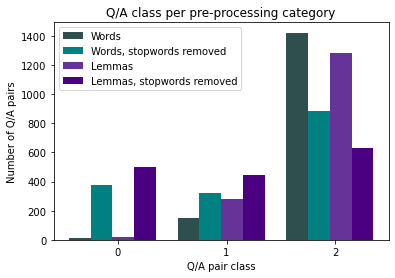

In [23]:
overlap_values_word, df_word_class_vals = display_sentence_statistics(df_word, 'words')
overlap_values_word_stop, df_word_stop_class_vals = display_sentence_statistics(df_word_stop, 'words, stopwords removed')
overlap_values_lemma, df_lemma_class_vals = display_sentence_statistics(df_lemma, 'lemmas')
overlap_values_lemma_stop, df_lemma_stop_class_vals = display_sentence_statistics(df_lemma_stop, 'lemmas, stopwords removed')

values = [overlap_values_word, overlap_values_word_stop, overlap_values_lemma, overlap_values_lemma_stop]
plot_overlap_comparison(values)


patch:  Rectangle(xy=(0.0666667, 0), width=0.266667, height=487, angle=0)
patch:  Rectangle(xy=(0.733333, 0), width=0.266667, height=438, angle=0)
patch:  Rectangle(xy=(1.4, 0), width=0.266667, height=654, angle=0)
[0.3666666666666666, 1.0333333333333332, 1.7]
n bins:  3


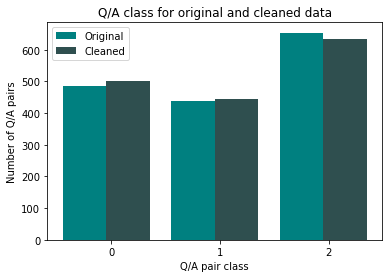

In [24]:
values = [overlap_values_lemma_stop_o, overlap_values_lemma_stop]
plot_cleaned_class_comparison(values)

In [241]:
# print some examples from each of the data classes:
def save_sentence_statistics(filename, df, type, title):
    with open(filename, 'w') as out:
        out.write(title+ '\n')
        for index, row in df.iterrows():
            out.write('-------------------'+ '\n')
            out.write('question, parsed: ' + ' '.join(row['q_'+type]) + '\n')
            out.write('question, original: ' + ' '.join(row['q_original']) + '\n')
            out.write('missing words context: ' + ' '.join(row['missing_words_context']) + '\n')
            out.write('sentence with answer, parsed: ' + ' '.join(row['sent_'+type]) + '\n')
            out.write('sentence with answer, original: ' + ' '.join(row['sent_original']) + '\n')
            out.write('overlap class: ' + str(row['overlap_class']) + '\n')
            relevant_sentences = row['matching_original_sentences']
            out.write('matching sentences, original: \n')
            for sent in relevant_sentences:
                out.write(sent + '\n')

In [242]:
save_sentence_statistics('../figures/relevant_sentences/relevant-sentences-lemma-stop_top_3.txt', df_lemma_stop, 'stop_lemmas', 'Relevant sentences for questions in dataset. Statistics for lemma with stopwords removed.')

In [243]:
save_sentence_statistics('../figures/relevant_sentences/relevant-sentences-word-stop.txt', df_word_stop, 'stop_words', 'Relevant sentences for questions in dataset. Statistics for words with stopwords removed.')

In [244]:
# calculate the 25-th percentile of number of relevant sentences
print(np.percentile(df_lemma_stop['num_overlap_sentences'].values, 25))

3.0


In [245]:
# compare sorted / unsorted relevant sentences
def save_ranked_sentence_statistics(filename, df, type, title):
    with open(filename, 'w') as out:
        out.write(title+ '\n')
        for index, row in df.iterrows():
            out.write('-------------------'+ '\n')
            out.write('overlap class: ' + str(row['overlap_class']) + '\n')
            out.write('question, parsed: ' + ' '.join(row['q_'+type]) + '\n')
            out.write('question, original: ' + ' '.join(row['q_original']) + '\n')
            out.write('missing words context: ' + ' '.join(row['missing_words_context']) + '\n')
            out.write('sentence with answer, parsed: ' + ' '.join(row['sent_'+type]) + '\n')
            out.write('sentence with answer, original: ' + ' '.join(row['sent_original']) + '\n')
            relevant_sentences = row['matching_original_sentences']
            ranked_relevant_sentences = row['ranked_matching_original_sentences']
            out.write('top 3 matching sentences: \n')
            max = 3
            if len(relevant_sentences) < max:
                max = len(relevant_sentences)
            for sent in relevant_sentences[:max]:
                out.write(sent + '\n')
            out.write('top RANKED matching sentences: \n')
            for sent in ranked_relevant_sentences[:max]:
                out.write(sent + '\n')

In [246]:
save_ranked_sentence_statistics('../figures/relevant_sentences/ranked-relevant-sentences-lemma-stop.txt', df_lemma_stop, 'stop_lemmas', 'Ranked relevant sentences for questions in dataset. Statistics for lemma with stopwords removed.')

In [263]:
# create some statistics for how close to the sentence containing the answer, the relevant sentences are
def extract_proximity_of_ranked_relevant_sentences(df):
    top_ranked_sentence_diff = []
    for index, row in df.iterrows():
        matching_sent_ids = list(row['matching_sentence_ids'])
        ranked_matching_sent_ids = list(row['ranked_matching_sentence_ids'])
        sent_with_ans = matching_sent_ids[0]
        top_ranked_sent = ranked_matching_sent_ids[0]
        if len(ranked_matching_sent_ids) > 1:
            if sent_with_ans == top_ranked_sent:
                top_ranked_sent = ranked_matching_sent_ids[1]
            else:
                top_ranked_sent = ranked_matching_sent_ids[0]
        else: # if there are no other sentences than the sentence containing the answer
            top_ranked_sent = None
        diff = -1
        if top_ranked_sent:
            diff = np.abs(sent_with_ans - top_ranked_sent)
            if diff > 20:
               diff = 20
        top_ranked_sentence_diff.append(diff)
    return top_ranked_sentence_diff

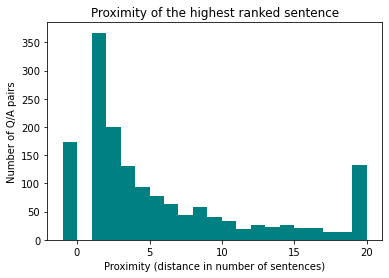

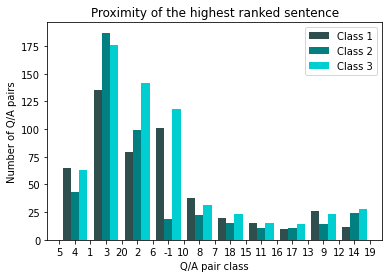

In [264]:
diff_arr = extract_proximity_of_ranked_relevant_sentences(df_lemma_stop)
plot_question_type_stats_num(diff_arr, 'Proximity of the highest ranked sentence', None, 'Proximity (distance in number of sentences)')

diff_arr_1 = extract_proximity_of_ranked_relevant_sentences(df_lemma_stop_class_vals[0])
diff_arr_2 = extract_proximity_of_ranked_relevant_sentences(df_lemma_stop_class_vals[1])
diff_arr_3 = extract_proximity_of_ranked_relevant_sentences(df_lemma_stop_class_vals[2])
diff_str_1 = [str(val) for val in diff_arr_1]
diff_str_2 = [str(val) for val in diff_arr_2]
diff_str_3 = [str(val) for val in diff_arr_3]

names = ['Class 1', 'Class 2', 'Class 3']
plot_proximity_stats([diff_str_1, diff_str_2, diff_str_3], names, 'Proximity of the highest ranked sentence')